# Predicting COVID-19 from Chest X-Ray Images

### IMPORTING LIBRARIES

In [ ]:
!pip install tensorflow

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### CLONING DATASET

In [2]:
# CLONING THE DATASET FROM THE GITHUB REPOSITORY
!git clone https://github.com/ArsalMirza007/COVID_19_Prediction-Using-TensorFlow.git

Cloning into 'COVID_19_Prediction-Using-TensorFlow'...
remote: Enumerating objects: 2304, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 2304 (delta 0), reused 3 (delta 0), pack-reused 2301
Receiving objects: 100% (2304/2304), 1.31 GiB | 11.67 MiB/s, done.
Updating files: 100% (2297/2297), done.


In [11]:
import os

main_dir = "/content/COVID_19_Prediction-Using-TensorFlow/Chext-X-ray-Images-Data-Set/DataSet/Data"

# SETTING TRAIN AND TEST DIRECTORY
train_dir = os.path.join(main_dir, "train")
test_dir = os.path.join(main_dir, "test")

#SETING DIRECTORY FOR COVID AND NORMAL IMAGES DIRECTORY
train_covid_dir = os.path.join(train_dir, "COVID19")
train_normal_dir = os.path.join(train_dir, "NORMAL")

test_covid_dir = os.path.join(test_dir, "COVID19")
test_normal_dir = os.path.join(test_dir, "NORMAL")


In [12]:
# MAKING SEPERATE FILES :
train_covid_names = os.listdir(train_covid_dir)
train_normal_names = os.listdir(train_normal_dir)

test_covid_names = os.listdir(test_covid_dir)
test_normal_names = os.listdir(test_normal_dir)

### PERFORMING DATA VISUALIZATION

['/content/COVID_19_Prediction-Using-TensorFlow/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID19(288).jpg', '/content/COVID_19_Prediction-Using-TensorFlow/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID19(155).jpg', '/content/COVID_19_Prediction-Using-TensorFlow/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID19(566).jpg', '/content/COVID_19_Prediction-Using-TensorFlow/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID19(126).jpg', '/content/COVID_19_Prediction-Using-TensorFlow/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID19(537).jpg', '/content/COVID_19_Prediction-Using-TensorFlow/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID19(540).jpg', '/content/COVID_19_Prediction-Using-TensorFlow/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID19(187).jpg', '/content/COVID_19_Prediction-Using-TensorFlow/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID19(418).jpg']
['/content/COVID_19_Prediction-

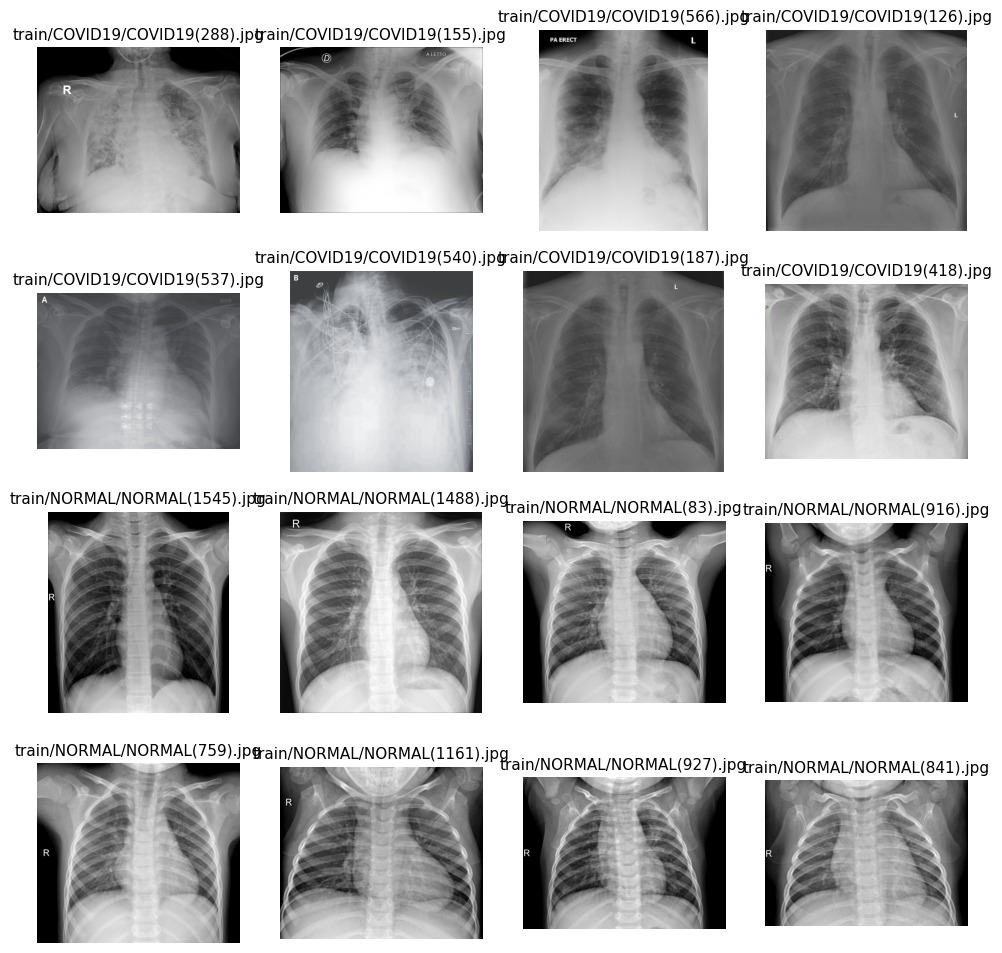

In [13]:
import matplotlib.image as mpimg

rows = 4
columns = 4

fig = plt.gcf()
fig.set_size_inches(12,12)

covid_img = [os.path.join(train_covid_dir, filename) for filename in train_covid_names[0:8]]
normal_img = [os.path.join(train_normal_dir, filename) for filename in train_normal_names[0:8]]

print(covid_img)
print(normal_img)

merged_img = covid_img + normal_img

for i, img_path in enumerate(merged_img):
  title = img_path.split("/", 6)[6]
  plot = plt.subplot(rows, columns, i+1)
  plot.axis("Off")
  img = mpimg.imread(img_path)
  plot.set_title(title, fontsize = 11)
  plt.imshow(img, cmap= "gray")

plt.show()

# DATA PREPROCESSING AND AUGMENTATION

In [14]:
# CREATING TRAINING, TESTING AND VALIDATION BATCHES

dgen_train = ImageDataGenerator(rescale = 1./255,
                                validation_split = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)

dgen_validation = ImageDataGenerator(rescale = 1./255,
                                     )

dgen_test = ImageDataGenerator(rescale = 1./255,
                              )

train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150, 150),
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')
validation_generator = dgen_train.flow_from_directory(train_dir,
                                                      target_size = (150, 150),
                                                      subset = "validation",
                                                      batch_size = 32,
                                                      class_mode = "binary")
test_generator = dgen_test.flow_from_directory(test_dir,
                                               target_size = (150, 150),
                                               batch_size = 32,
                                               class_mode = "binary")




Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [15]:
print("Class Labels are: ", train_generator.class_indices)
print("Image shape is : ", train_generator.image_shape)

Class Labels are:  {'COVID19': 0, 'NORMAL': 1}
Image shape is :  (150, 150, 3)


### BUILDING CONVOLUTIONAL NEURAL NETWORK MODEL

In [16]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()

# 1) CONVOLUTIONAL LAYER - 1
model.add(Conv2D(32, (5,5), padding = "same", activation = "relu", input_shape = train_generator.image_shape))

# 2) POOLING LAYER - 1
model.add(MaxPooling2D(pool_size=(2,2)))

# 3) DROPOUT LAYER -2
model.add(Dropout(0.5))

# 4) CONVOLUTIONAL LAYER - 2
model.add(Conv2D(64, (5,5), padding = "same", activation = "relu"))

# 5) POOLING LAYER - 2
model.add(MaxPooling2D(pool_size=(2,2)))

# 6) DROPOUT LAYER - 2
model.add(Dropout(0.5))

# 7) FLATTENING LAYER TO 2D SHAPE
model.add(Flatten())

# 8) ADDING A DENSE LAYER
model.add(Dense(256, activation = 'relu'))

# 9 DROPOUT LAYER - 3
model.add(Dropout(0.5))

# 10) FINAL OUTPUT LAYER
model.add(Dense(1, activation = 'sigmoid'))

### PRINTING MODEL SUMMARY
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

### COMPILING AND TRAINING THE NEURAL NETWORK MODEL

In [17]:
# COMPILING THE MODEL

model.compile(Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [18]:
# TRAINING THE MODEL
history = model.fit(train_generator,
                    epochs = 35,
                    validation_data = validation_generator)

Epoch 1/35
46/46 [==============================] - 57s 1s/step - loss: 1.2515 - accuracy: 0.7226 - val_loss: 0.4233 - val_accuracy: 0.8453
Epoch 2/35
46/46 [==============================] - 47s 1s/step - loss: 0.2473 - accuracy: 0.8992 - val_loss: 0.3023 - val_accuracy: 0.9199
Epoch 3/35
46/46 [==============================] - 42s 915ms/step - loss: 0.1914 - accuracy: 0.9372 - val_loss: 0.2011 - val_accuracy: 0.9503
Epoch 4/35
46/46 [==============================] - 41s 902ms/step - loss: 0.1609 - accuracy: 0.9420 - val_loss: 0.1529 - val_accuracy: 0.9641
Epoch 5/35
46/46 [==============================] - 41s 891ms/step - loss: 0.1417 - accuracy: 0.9545 - val_loss: 0.1997 - val_accuracy: 0.9392
Epoch 6/35
46/46 [==============================] - 40s 870ms/step - loss: 0.1289 - accuracy: 0.9607 - val_loss: 0.1082 - val_accuracy: 0.9558
Epoch 7/35
46/46 [==============================] - 41s 892ms/step - loss: 0.1220 - accuracy: 0.9593 - val_loss: 0.5527 - val_accuracy: 0.7320
Epoch

# PERFORMING EVALUATION


In [19]:
# KEYS OF HISTORY OBJECT
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

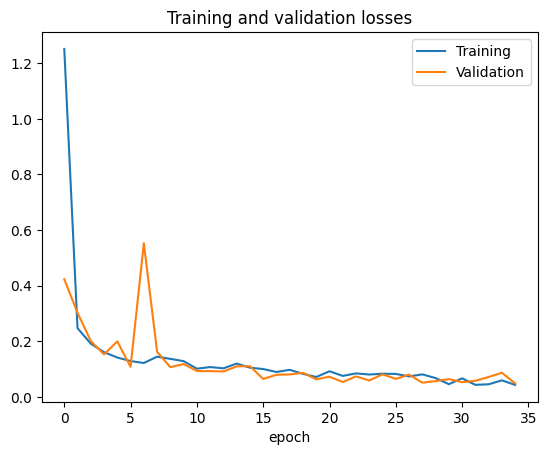

In [20]:
# PLOT GRAPH BETWEEN TRAINING AND VALIDATION LOSS
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation losses")
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

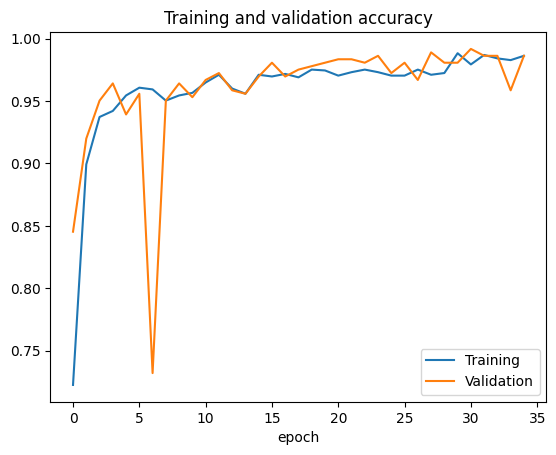

In [21]:
# PLOT GRAPH BETWEEN TRAINING AND VALIDATION ACCURACY
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation accuracy")
plt.xlabel('epoch')

In [22]:
# GETTING TEST ACCURACY AND LOSS

test_loss, test_acc = model.evaluate(test_generator)
print("Test Set Loss : ", test_loss)
print("Test Set Accuracy : ", test_acc)

16/16 [==============================] - 12s 701ms/step - loss: 0.0637 - accuracy: 0.9835
Test Set Loss :  0.06373103708028793
Test Set Accuracy :  0.9834710955619812


### Classification Report

In [23]:
from sklearn.metrics import classification_report

# Get predicted probabilities from the model
predicted_probabilities = model.predict(test_generator)

# Convert probabilities to class predictions
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Extract true labels from the test data generator
true_labels = test_generator.classes

# Calculate classification report
report = classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices.keys())

# Print the classification report
print("\nClassification Report:")
print(report)

16/16 [==============================] - 9s 569ms/step

Classification Report:
              precision    recall  f1-score   support

     COVID19       0.35      1.00      0.51       167
      NORMAL       0.00      0.00      0.00       317

    accuracy                           0.35       484
   macro avg       0.17      0.50      0.26       484
weighted avg       0.12      0.35      0.18       484



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Confusion Matrix

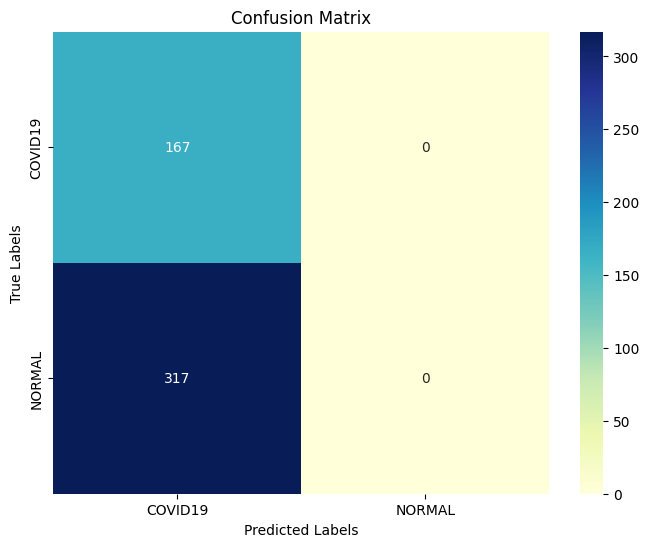

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### PREDICTION ON NEW DATA (UPLOAD FILES)

In [25]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for filename in uploaded.keys():
  img_path = '/content/' + filename
  img = image.load_img(img_path, target_size = (150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images, axis = 0)
  prediction = model.predict(images)

  if prediction == 0:
    print("The report is COVID-19 Positive")
  else:
    print("The report is COVID-19 Negative")

Saving COVID19(70).jpg to COVID19(70).jpg
1/1 [==============================] - 0s 294ms/step
The report is COVID-19 Positive


In [29]:
# Save the model to an HDF5 file
model.save("Tensorflow_CNN_Model_for_Covid19_Prediction.h5")
print("Model saved to 'Tensorflow_CNN_Model_for_Covid19_Prediction.h5'")

Model saved to 'Tensorflow_CNN_Model_for_Covid19_Prediction.h5'
